# 6. Reasoning with word vectors (Word2vec)

## 6.2. Word vectors

In [1]:
## can't get this to work :(

# !pip install ipdb
# import numpy as np
# !pip install --upgrade numpy #==1.20.3
# !pip uninstall pycocotools
# !pip install pycocotools --no-binary pycocotools

# from nlpia.book.examples.ch06_nessvectors import *
# nessvector('Marie_Curie').round(2)

### 6.2.3. How to use the gensim.word2vec module

In [2]:
import os
from gensim.models.keyedvectors import KeyedVectors
# from nlpia.data.loaders import BIGDATA_PATH

# not in book, reader required to compose this path
# wordvector_path = os.path.join(BIGDATA_PATH, 'GoogleNews-vectors-negative300.bin.gz')
## https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
wordvector_path = os.path.join("../../bigdata", 'GoogleNews-vectors-negative300.bin.gz')

word_vectors = KeyedVectors.load_word2vec_format(wordvector_path, binary=True, limit=200000)

In [3]:
word_vectors.most_similar(positive=["cooking", "potatoes"], topn=5)

[('cook', 0.6973530650138855),
 ('sweet_potatoes', 0.6600280404090881),
 ('vegetables', 0.6513738036155701),
 ('onions', 0.6512383222579956),
 ('baking', 0.6481683850288391)]

In [4]:
## can't get this to work :(
## KeyError: "Key 'germany' not present in vocabulary"
# word_vectors.most_similar(positive=["germany", "france"], topn=1)

In [5]:
word_vectors.doesnt_match("potatoes milk cake computer".split())

'computer'

In [6]:
word_vectors.most_similar(positive=["king", "woman"], negative=["man"], topn=2)

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827)]

In [7]:
word_vectors.similarity("queen", "princess")

0.7070532

In [8]:
word_vectors["phone"]

array([-0.01446533, -0.12792969, -0.11572266, -0.22167969, -0.07373047,
       -0.05981445, -0.10009766, -0.06884766,  0.14941406,  0.10107422,
       -0.03076172, -0.03271484, -0.03125   , -0.10791016,  0.12158203,
        0.16015625,  0.19335938,  0.0065918 , -0.15429688,  0.03710938,
        0.22753906,  0.1953125 ,  0.08300781,  0.03686523, -0.02148438,
        0.01483154, -0.21289062,  0.16015625,  0.29101562, -0.03149414,
       -0.05883789,  0.04418945, -0.11767578, -0.12597656,  0.08447266,
       -0.10791016, -0.11279297,  0.17871094,  0.04467773,  0.17675781,
       -0.17089844, -0.02160645, -0.00061417, -0.17480469, -0.04760742,
        0.06835938, -0.0546875 ,  0.04467773, -0.19628906, -0.18554688,
       -0.10839844, -0.06030273,  0.11474609,  0.08544922,  0.05859375,
        0.23925781, -0.07080078,  0.11816406, -0.11132812,  0.08300781,
       -0.04394531,  0.00970459, -0.1484375 ,  0.265625  , -0.13769531,
        0.23535156, -0.19824219,  0.31445312,  0.02734375,  0.16

### 6.2.4. How to generate your own word vector representations

In [9]:
# token_list = [
#     ["to", "provide", "early", "intervention/early", "childhood", "special", "education", "services", "to", "eligible",
#      "children", "and", "their" "families"],
#     ["essential job functions".split()],
#     ["participate as a transdisciplinary team member to complete educational assessments for".split()]
# ]
token_list = [['to',
  'provide',
  'early',
  'intervention',
  'childhood',
  'special',
  'education',
  'services',
  'to',
  'eligible',
  'children',
  'and',
  'their',
  'families'],
 ['essential', 'job', 'functions'],
 ['participate',
   'as',
   'a',
   'transdisciplinary',
   'team',
   'member',
   'to',
   'complete',
   'educational',
   'assessments',
   'for']]
token_list

[['to',
  'provide',
  'early',
  'intervention',
  'childhood',
  'special',
  'education',
  'services',
  'to',
  'eligible',
  'children',
  'and',
  'their',
  'families'],
 ['essential', 'job', 'functions'],
 ['participate',
  'as',
  'a',
  'transdisciplinary',
  'team',
  'member',
  'to',
  'complete',
  'educational',
  'assessments',
  'for']]

In [10]:
from gensim.models.word2vec import Word2Vec

num_features = 300   ## Number of vectorr elements (dimensions) to represent the word vector
min_word_count = 3   ## Min number of word count to be considered in the Word2vec model. If your corpus is small,
                     ## reduce the min count. If you're training with a large corpus, increase the min count.
num_workers = 2      ## Number of CPU cores used for the training. If you want to set the number of cores
                     ## dynamically, check out import multiprocessing; num_workers = multiprocessing.cpu_count().
window_size = 6      ## Context window size
subsampling = 1e-3   ## Subsampling rate for frequent terms

In [11]:
model = Word2Vec(
    token_list,
    workers=num_workers,
    vector_size=num_features,
    min_count=min_word_count,
    window=window_size,
    sample=subsampling)

In [12]:
model.init_sims(replace=True)

/tmp/ipykernel_142/1992334471.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [13]:
model_name = "my_domain_specific_word2vec_model"
model.save(model_name)

In [14]:
model = Word2Vec.load(model_name)
# model.most_similar("radiology")

### 6.2.6. fastText

In [15]:
## can't get this to work :(
# # from gensim.models.fasttext import FastText
# from gensim.models.fasttext import load_facebook_model

# ## https://fasttext.cc/docs/en/pretrained-vectors.html
# ft_wordvector_path = os.path.join("../../bigdata", 'wiki.en.bin')
# # ft_wordvector_path = os.path.join("../../bigdata", 'wiki-news-300d-1M.vec')
# # ft_model = FastText.load_fasttext_format(model_file=ft_wordvector_path)
# ft_model = load_facebook_model(ft_wordvector_path)

# ft_model.most_similar("soccer")

### 6.2.8. Visualising word relationships

In [16]:
len(word_vectors)

200000

In [17]:
import pandas as pd

# vocab = pd.Series(word_vectors.vocab)
vocab = pd.Series(sorted(word_vectors.index_to_key))
vocab.iloc[55930:55936]

55930                      Illicit
55931                  Illingworth
55932                       Illini
55933                     Illinois
55934          Illinois_Tool_Works
55935    Illinois_Urbana_Champaign
dtype: object

In [18]:
word_vectors["Illini"]

array([ 0.15625   ,  0.18652344,  0.33203125,  0.55859375,  0.03637695,
       -0.09375   , -0.05029297,  0.16796875, -0.0625    ,  0.09912109,
       -0.0291748 ,  0.39257812,  0.05395508,  0.35351562, -0.02270508,
        0.05957031,  0.06640625, -0.24511719,  0.32617188, -0.00149536,
        0.46875   , -0.00534058,  0.03271484,  0.36523438, -0.3046875 ,
       -0.08984375,  0.04956055,  0.08691406,  0.18847656, -0.16992188,
       -0.1328125 , -0.19433594,  0.11230469, -0.33984375,  0.03588867,
        0.07373047,  0.1328125 ,  0.02270508, -0.06005859,  0.421875  ,
        0.25195312, -0.39257812,  0.01733398, -0.28320312, -0.33203125,
        0.12890625, -0.16992188,  0.21289062,  0.15039062,  0.12207031,
        0.15820312,  0.02307129, -0.359375  , -0.046875  ,  0.01672363,
        0.14257812, -0.01477051,  0.3828125 , -0.06079102, -0.390625  ,
        0.06176758, -0.06738281, -0.06884766,  0.1640625 , -0.08007812,
        0.2421875 ,  0.02380371,  0.07177734, -0.03808594,  0.51

In [19]:
import numpy as np

np.linalg.norm(word_vectors["Illinois"] - word_vectors["Illini"])

3.36538

In [20]:
cos_similarity = np.dot(word_vectors["Illinois"], word_vectors["Illini"] / (
    np.linalg.norm(word_vectors["Illinois"]) *\
    np.linalg.norm(word_vectors["Illini"])))

cos_similarity

0.5501352

In [21]:
1 - cos_similarity

0.44986480474472046

In [22]:
# from nlpia.data.loaders import get_data
# cities = get_data("cities")

## https://www.dropbox.com/s/tcri5eyzpabhnyy/cities.csv.gz?dl=1

cities = pd.read_csv("../../bigdata/cities.csv.gz")

cities.head(1).T

/tmp/ipykernel_142/3228989222.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  cities = pd.read_csv("../../bigdata/cities.csv.gz")


,0
geonameid,3039154
name,El Tarter
asciiname,El Tarter
alternatenames,"Ehl Tarter,Эл Тартер"
latitude,42.57952
longitude,1.65362
feature_class,P
feature_code,PPL
country_code,AD
cc2,NaN


In [53]:
us = cities[(cities.country_code == 'US') & (cities.admin1_code.notnull())].copy()
states = pd.read_csv('http://www.fonz.net/blog/wp-content/uploads/2008/04/states.csv')
states = dict(zip(states.Abbreviation, states.State))
us['city'] = us.name.copy()
us['st'] = us.admin1_code.copy()
us['state'] = us.st.map(states)
print(us.shape)
us[us.columns[-3:]].head()

(11790, 22)


,city,st,state
129157,Bay Minette,AL,Alabama
129158,Edna,TX,Texas
129159,Bayou La Batre,AL,Alabama
129160,Henderson,TX,Texas
129161,Natalia,TX,Texas


In [24]:
vocab = pd.np.concatenate([us.city, us.st, us.state])
vocab = np.array([word for word in vocab if word in word_vectors])
vocab[:5]

/tmp/ipykernel_142/4209540493.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  vocab = pd.np.concatenate([us.city, us.st, us.state])


array(['Edna', 'Henderson', 'Natalia', 'Yorktown', 'Brighton'],
      dtype='<U15')

In [25]:
city_plus_state = []
us = us.sort_values('population', ascending=False)
for c, state, st in zip(us.city, us.state, us.st):
    if c not in vocab:
        continue
    row = []
    if state in vocab:
        row.extend(word_vectors[c] + word_vectors[state])
    else:
        row.extend(word_vectors[c] + word_vectors[st])
    city_plus_state.append(row)
us_300D_sorted = pd.DataFrame(city_plus_state)
del city_plus_state

In [26]:
us_300D_sorted.shape

(6537, 300)

In [27]:
# us_300D = get_data("cities_us_wordvectors")
## https://www.dropbox.com/s/7ujezmo03b637q3/cities_us_wordvectors.csv.gz?dl=1
us_300D = pd.read_csv("../../bigdata/cities_us_wordvectors.csv.gz")
us_300D.shape

(8861, 302)

In [28]:
# num_cities = 10  # simplified plot of 10 largest cities at beginning of the chapter
num_cities = 500  # Detailed eye candy plot of US cities

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# us_2D = pca.fit_transform(us_300D.iloc[:num_cities, :300])
us_2D = pca.fit_transform(us_300D_sorted.iloc[:num_cities, :300])
us_2D.shape

(500, 2)

In [69]:
pd.DataFrame(us_2D).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float32
 1   1       500 non-null    float32
dtypes: float32(2)
memory usage: 4.0 KB


In [77]:
df = pd.DataFrame(us_2D)
df.columns = ["x", "y"]
df = pd.concat([df, us.sort_values('population', ascending=False).reset_index().iloc[:num_cities]], axis=1)
# df = df.loc[pd.notnull(df.name) & pd.notnull(df["x"])]
print(df.shape)
df.head()

(500, 25)


,x,y,index,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,...,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date,city,st,state
0,-0.803890,2.154310,138033,5368361,Los Angeles,Los Angeles,"Angelopolis,Cuidad De Los Angelos,Cuidad De lo...",34.05223,-118.24368,P,...,NaN,NaN,3971883,89.0,96,America/Los_Angeles,2017-06-29,Los Angeles,CA,California
1,-0.536490,-1.215153,135326,4887398,Chicago,Chicago,"CHI,Cekaga,Chi-ka-ko,Chi-kâ-kô,Chicago,Chicagu...",41.85003,-87.65005,P,...,14000,NaN,2720546,179.0,180,America/Chicago,2017-05-23,Chicago,IL,Illinois
2,-0.913035,0.403169,134932,4699066,Houston,Houston,"Chiouston,Gorad Khjustan,HOU,Hiu-su-tun,Hiusto...",29.76328,-95.36327,P,...,NaN,NaN,2296224,12.0,30,America/Chicago,2017-03-09,Houston,TX,Texas
3,0.617377,0.166212,134006,4560349,Philadelphia,Philadelphia,"Coaquannock,Fi-sang,Fi-sàng,Filadel'fi,Filadel...",39.95233,-75.16379,P,...,60000,NaN,1567442,12.0,40,America/New_York,2017-05-23,Philadelphia,PA,Pennsylvania
4,-0.512638,-1.067288,137477,5308655,Phoenix,Phoenix,"East Phoenix,Feniks,Fenikso,Finiks,Finiksa,Fin...",33.44838,-112.07404,P,...,NaN,NaN,1563025,331.0,366,America/Phoenix,2017-03-09,Phoenix,AZ,Arizona


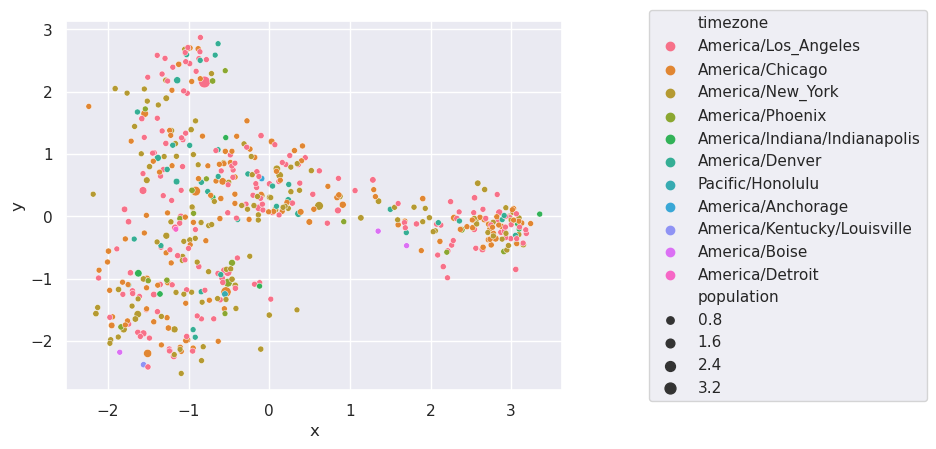

In [118]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.scatterplot(data=df, x="x", y="y", size="population", hue="timezone")

g.legend(loc='right', bbox_to_anchor=(1.75, 0.5), ncol=1)
plt.show()

In [33]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 760.2 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11431 sha256=f6f6f654542d94b4495bd3559c75f0df3225d698881598b2e485dc6c888f003f
  Stored in directory: /home/jovyan/.cache/pip/wheels/21/0a/27/62f77273aa12fefb20b9b277f1e937f98ae16dbd04ffa2b93a
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [99]:
## couldn't get nlpia.plots to work so attempt to recreatehack code locally

# import plotly.chartstudio as plotly
import chart_studio.plotly as plotly
from plotly.graph_objs.layout import XAxis, YAxis
# from pugnlp.util import clean_columns
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
# from plotly.offline.offline import _plot_html

import plotly.graph_objects as go

# from nlpia.constants import DATA_PATH

DATA_PATH = os.path.join(os.path.dirname("../../"), 'data')
print(DATA_PATH)

PLOTLY_HTML = """
<html>
  <head>
    <meta charset="utf-8" />
    <!-- <meta http-equiv="Content-Type" content="text/html; charset=utf-8"> -->
    <script type="text/javascript">
    {plotlyjs}
    </script>
  </head>
  <body>
    {plotlyhtml}
  </body>
</html>
"""

DEFAULT_PLOTLY_CONFIG = {
    'staticPlot': False,  # no interactivity, for export or image generation
    'workspace': False,  # we're in the workspace, so need toolbar etc
    'editable': False,  # we can edit titles, move annotations, etc
    'autosizable': False,  # plot will respect layout.autosize=true and infer its container size
    'fillFrame': False,  # if we DO autosize, do we fill the container or the screen?
    'scrollZoom': False,  # mousewheel or two-finger scroll zooms the plot
    'doubleClick': 'reset+autosize',  # double click interaction (false, 'reset', 'autosize' or 'reset+autosize')
    'showTips': True,  # new users see some hints about interactivity
    'showLink': True,  # link to open this plot in plotly
    'sendData': True,  # if we show a link, does it contain data or just link to a plotly file?
    'linkText': 'Edit chart',  # text appearing in the sendData link
    'displayModeBar': 'true',  # display the modebar (true, false, or 'hover')
    'displaylogo': False,  # add the plotly logo on the end of the modebar
    'plot3dPixelRatio': 2,  # increase the pixel ratio for 3D plot images
    'setBackground': 'opaque'  # fn to add the background color to a different container or 'opaque'
                               # to ensure there's white behind it
}

def offline_plotly_data(data, filename=None, config=None, validate=True,
                        default_width='100%', default_height=525, global_requirejs=False):
    r""" Write a plotly scatter plot to HTML file that doesn't require server

    >>> from nlpia.loaders import get_data
    >>> df = get_data('etpinard')  # pd.read_csv('https://plot.ly/~etpinard/191.csv')
    >>> df.columns = [eval(c) if c[0] in '"\'' else str(c) for c in df.columns]
    >>> data = {'data': [
    ...          Scatter(x=df[continent+', x'],
    ...                  y=df[continent+', y'],
    ...                  text=df[continent+', text'],
    ...                  marker=Marker(size=df[continent+', size'].fillna(10000), sizemode='area', sizeref=131868,),
    ...                  mode='markers',
    ...                  name=continent) for continent in ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
    ...      ],
    ...      'layout': Layout(xaxis=XAxis(title='Life Expectancy'), yaxis=YAxis(title='GDP per Capita', type='log'))
    ... }
    >>> html = offline_plotly_data(data, filename=None)
    """
    config_default = dict(DEFAULT_PLOTLY_CONFIG)
    if config is not None:
        config_default.update(config)
    with open(os.path.join(DATA_PATH, 'plotly.js.min'), 'rt') as f:
        js = f.read()
    html, divid, width, height = _plot_html(
        data,
        config=config_default,
        validate=validate,
        default_width=default_width, default_height=default_height,
        global_requirejs=global_requirejs)
    # fig = go.Figure(
    #     data,
    #     config=config_default,
    #     validate=validate,
    #     default_width=default_width, default_height=default_height,
    #     global_requirejs=global_requirejs)
    # html = fig.to_html()
    html = PLOTLY_HTML.format(plotlyjs=js, plotlyhtml=html)
    if filename and isinstance(filename, str):
        with open(filename, 'wt') as f:
            f.write(html)
    return html

def offline_plotly_scatter_bubble(df, x='x', y='y', size_col='size', text_col='text',
                                  category_col='category', possible_categories=None,
                                  filename=None,
                                  config={'displaylogo': False},
                                  xscale=None, yscale='log',
                                  layout={'hovermode': 'closest', 'showlegend': False, 'autosize': True},
                                  marker={'sizemode': 'area'},
                                  min_size=10,
                                  ):
    r"""Interactive scatterplot of a DataFrame with the size and color of circles linke to two columns

    config keys:
      fillFrame setBackground displaylogo sendData showLink linkText staticPlot scrollZoom plot3dPixelRatio displayModeBar
      showTips workspace doubleClick autosizable editable

    layout keys:
      angularaxis annotations autosize bargap bargroupgap barmode barnorm boxgap boxgroupgap boxmode calendar
      direction dragmode font geo height hiddenlabels hiddenlabelssrc hidesources hovermode images legend
      mapbox margin orientation paper_bgcolor plot_bgcolor radialaxis scene separators shapes showlegend sliders smith
      ternary title titlefont updatemenus width xaxis yaxis

    marker keys:
      autocolorscale blend border cauto cmax cmin color colorbar colors colorscale colorsrc colorssrc line maxdisplayed
      opacity opacitysrc outliercolor reversescale showscale size sizemax sizemin sizemode sizeref sizesrc symbol symbolsrc

    marker['sizeref'] gives the denominator of the circle scaling factor.
      Typically it should be about a tenth of the minimum 'size' column value

    >>> from nlpia.data.loaders import get_data
    >>> df = get_data('cities_us_wordvectors_pca2_meta').iloc[:100]
    >>> html = offline_plotly_scatter_bubble(
    ...     df.sort_values('population', ascending=False)[:350].copy().sort_values('population'),
    ...     x='x', y='y',
    ...     size_col='population', text_col='name', category_col='timezone',
    ...     xscale=None, yscale=None,  # 'log' or None
    ...     layout={}, marker={'sizeref': 3000})
    """
    config_default = dict(DEFAULT_PLOTLY_CONFIG)
    marker_default = {
        'size': size_col or min_size,
        'sizemode': 'area',
        'sizeref': int(df[size_col].min() * .8) if size_col else min_size}
    marker_default.update(marker)
    size_col = marker_default.pop('size')
    layout_default = {
        'xaxis': XAxis(title=x, type=xscale),
        'yaxis': YAxis(title=y, type=yscale),
    }
    layout_default.update(**layout)
    if config is not None:
        config_default.update(config)
    # df.columns = clean_columns(df.columns)
    if possible_categories is None and category_col is not None:
        if category_col in df.columns:
            category_labels = df[category_col]
        else:
            category_labels = np.array(category_col)
        possible_categories = list(set(category_labels))
    possible_categories = [None] if possible_categories is None else possible_categories
    if category_col and category_col in df:
        masks = [np.array(df[category_col] == label) for label in possible_categories]
    else:
        masks = [np.array([True] * len(df))] * len(possible_categories)
    data = {'data': [
            Scatter(x=df[x][mask].values,
                    y=df[y][mask].values,
                    text=df[text_col][mask].values,
                    marker=Marker(size=df[size_col][mask] if size_col in df.columns else size_col,
                                  **marker_default),
                    mode='markers',
                    name=str(category_name)) for (category_name, mask) in zip(possible_categories, masks)
            ],
            'layout': Layout(**layout_default)
            }
    return offline_plotly_data(data, filename=filename, config=config_default)

# offline_plotly_scatter_bubble?

../../data


In [100]:
import seaborn
from matplotlib import pyplot as plt
# from nlpia.plots import offline_plotly_scatter_bubble

# df = get_data("cities_us_wordvectors_pca2_meta")

html = offline_plotly_scatter_bubble(
    # us_2D.sort_values("population", ascending=False)[:350].copy()\
        # .sort_values("population"),
    df.copy(),
    filename="plotly_scatter_bubble.html",
    x="x", y="y",
    size_col="population",
    text_col="name", category_col="timezone",
    xscale=None, yscale=None, # "log" or None
    layout={}, marker={"sizeref": 3000})

TypeError: invalid Figure property: config
config
Bad property path:
config
^^^^^^

### 6.2.10 Document similarity with Doc2vec

In [107]:
import multiprocessing
num_cores = multiprocessing.cpu_count()
num_cores

8

In [108]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.utils import simple_preprocess

In [109]:
corpus = ["This is the first document ...",
          "another document ..."]
training_corpus = []

for i, text in enumerate(corpus):
    tagged_doc = TaggedDocument(simple_preprocess(text), [i])
    training_corpus.append(tagged_doc)
    
training_corpus

[TaggedDocument(words=['this', 'is', 'the', 'first', 'document'], tags=[0]),
 TaggedDocument(words=['another', 'document'], tags=[1])]

In [114]:
model = Doc2Vec(vector_size=100, min_count=2, workers=num_cores, epochs=10)
model.build_vocab(training_corpus)
model.train(training_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [116]:
model.infer_vector(simple_preprocess("This is a completely unseen document"), epochs=10)

array([-1.9862906e-03, -4.5208256e-03, -3.0081994e-03, -8.3802489e-04,
        2.7376735e-03,  3.6004251e-03,  2.7155662e-03, -4.7555869e-03,
       -4.5315693e-03, -1.0015309e-04,  9.6241356e-04, -1.3302729e-03,
        2.1187598e-03, -8.0405711e-04, -4.0762643e-03, -5.2490475e-04,
        8.9573802e-04, -4.6298071e-03, -4.1797222e-04, -2.5968987e-03,
        9.5779717e-04, -1.5391436e-03, -2.6258333e-03, -2.7084774e-03,
        3.2209992e-04, -1.7293631e-04, -2.2746301e-03, -1.7214698e-03,
       -3.9839251e-03, -3.2183521e-03,  4.2662583e-03, -3.2810272e-05,
        2.3473967e-03, -1.8656036e-03, -9.4478368e-04,  1.8056262e-03,
        8.5966231e-04,  8.9674117e-04, -1.8908920e-03,  7.7080843e-04,
        1.5331239e-03, -3.1585002e-03,  3.9204834e-03, -4.3007047e-03,
       -3.7604561e-03,  3.9935886e-04,  4.4224244e-03,  8.4434508e-04,
       -3.3932537e-04, -2.2693961e-03, -1.1991209e-03,  1.2832647e-03,
       -7.7242730e-04,  3.3814544e-03, -3.1873148e-03,  2.7874112e-05,
      